In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.3798 - accuracy: 0.3857 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 1s 22ms/step - loss: 1.3718 - accuracy: 0.4296 - val_loss: 1.3459 - val_accuracy: 0.7724
Epoch 2/1000
13/25 [==============>...............] - ETA: 0s - loss: 1.3377 - accuracy: 0.5625
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 9ms/step - loss: 1.3283 - accuracy: 0.5710 - val_loss: 1.3061 - val_accuracy: 0.8423
Epoch 3/1000
15/25 [=================>............] - ETA: 0s - loss: 1.3003 - accuracy: 0.6391
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 10ms/step - loss: 1.2908 - accuracy: 0.6507 - val_loss: 1.2671 - val_accuracy: 0.8414
Epoch 4/1000
25/25 [==============================] - ETA: 0s - 

13/25 [==============>...............] - ETA: 0s - loss: 0.4386 - accuracy: 0.8588
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 9ms/step - loss: 0.4342 - accuracy: 0.8624 - val_loss: 0.2420 - val_accuracy: 0.9613
Epoch 28/1000
17/25 [===================>..........] - ETA: 0s - loss: 0.4152 - accuracy: 0.8704
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.8598 - val_loss: 0.2309 - val_accuracy: 0.9622
Epoch 29/1000
24/25 [===========================>..] - ETA: 0s - loss: 0.4132 - accuracy: 0.8711
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 10ms/step - loss: 0.4148 - accuracy: 0.8709 - val_loss: 0.2244 - val_accuracy: 0.9651
Epoch 30/1000
12/25 [=============>................] - ETA: 0s - loss: 0.4

14/25 [===============>..............] - ETA: 0s - loss: 0.3568 - accuracy: 0.8867
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.3497 - accuracy: 0.8872 - val_loss: 0.1451 - val_accuracy: 0.9802
Epoch 54/1000
12/25 [=============>................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8971
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 9ms/step - loss: 0.3115 - accuracy: 0.8948 - val_loss: 0.1420 - val_accuracy: 0.9792
Epoch 55/1000
14/25 [===============>..............] - ETA: 0s - loss: 0.3113 - accuracy: 0.8996
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.8951 - val_loss: 0.1420 - val_accuracy: 0.9802
Epoch 56/1000
15/25 [=================>............] - ETA: 0s - loss: 0.33

13/25 [==============>...............] - ETA: 0s - loss: 0.2734 - accuracy: 0.9038
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 9ms/step - loss: 0.2758 - accuracy: 0.9087 - val_loss: 0.1248 - val_accuracy: 0.9821
Epoch 80/1000
24/25 [===========================>..] - ETA: 0s - loss: 0.2718 - accuracy: 0.9124
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 0.2757 - accuracy: 0.9115 - val_loss: 0.1256 - val_accuracy: 0.9811
Epoch 81/1000
16/25 [==================>...........] - ETA: 0s - loss: 0.2684 - accuracy: 0.9175
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.2756 - accuracy: 0.9109 - val_loss: 0.1210 - val_accuracy: 0.9802
Epoch 82/1000
15/25 [=================>............] - ETA: 0s - loss: 0.2

14/25 [===============>..............] - ETA: 0s - loss: 0.2527 - accuracy: 0.9180
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 10ms/step - loss: 0.2636 - accuracy: 0.9140 - val_loss: 0.1160 - val_accuracy: 0.9821
Epoch 106/1000
25/25 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9169
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 10ms/step - loss: 0.2531 - accuracy: 0.9169 - val_loss: 0.1184 - val_accuracy: 0.9802
Epoch 107/1000
12/25 [=============>................] - ETA: 0s - loss: 0.2698 - accuracy: 0.9134
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.2601 - accuracy: 0.9191 - val_loss: 0.1185 - val_accuracy: 0.9811
Epoch 108/1000
15/25 [=================>............] - ETA: 0s - lo

15/25 [=================>............] - ETA: 0s - loss: 0.2445 - accuracy: 0.9198
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.2396 - accuracy: 0.9235 - val_loss: 0.1114 - val_accuracy: 0.9830
Epoch 132/1000
17/25 [===================>..........] - ETA: 0s - loss: 0.2352 - accuracy: 0.9164
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.2269 - accuracy: 0.9222 - val_loss: 0.1117 - val_accuracy: 0.9830
Epoch 133/1000
16/25 [==================>...........] - ETA: 0s - loss: 0.2557 - accuracy: 0.9126
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.2387 - accuracy: 0.9203 - val_loss: 0.1111 - val_accuracy: 0.9830
Epoch 134/1000
16/25 [==================>...........] - ETA: 0s - loss

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 197ms/step
[9.5839322e-01 2.0618699e-02 2.0585101e-02 4.0298633e-04]
0


# 混同行列

34/34 [==============================] - 0s 4ms/step


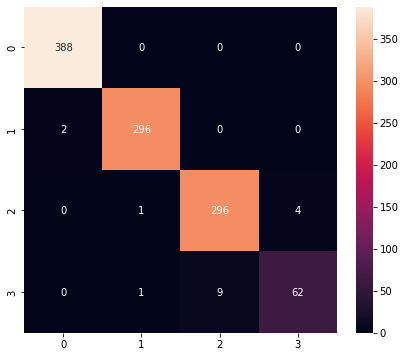

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       388
           1       0.99      0.99      0.99       298
           2       0.97      0.98      0.98       301
           3       0.94      0.86      0.90        72

    accuracy                           0.98      1059
   macro avg       0.97      0.96      0.97      1059
weighted avg       0.98      0.98      0.98      1059



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjbzlcs2a\assets


6376

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 7.99 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5839322e-01 2.0618705e-02 2.0585103e-02 4.0298630e-04]
0
